In [1]:
import pandas as pd
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from crimebb import *

In [3]:
YEAR="2021"

In [4]:
DATA_PATH="../data/"
CSV_PATH = f"{DATA_PATH}csv/{YEAR}/"

### Loading data

In [5]:
posts_threads_df = pd.read_csv(f"{CSV_PATH}post_thread_board.csv", sep="\t", low_memory=False)
posts_threads_df.shape, posts_threads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369015 entries, 0 to 3369014
Data columns (total 14 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   post_id             int64 
 1   site_id             int64 
 2   board_id            int64 
 3   thread_id           int64 
 4   username            object
 5   user_id             int64 
 6   user_num_posts      int64 
 7   user_reputation     int64 
 8   content             object
 9   quoted_post_ids     object
 10  post_data_creation  object
 11  site_name           object
 12  board_title         object
 13  thread_title        object
dtypes: int64(7), object(7)
memory usage: 359.8+ MB


((3369015, 14), None)

In [6]:
posts_threads_df = posts_threads_df[~posts_threads_df["content"].isna()].copy()
posts_threads_df.shape, posts_threads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369015 entries, 0 to 3369014
Data columns (total 14 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   post_id             int64 
 1   site_id             int64 
 2   board_id            int64 
 3   thread_id           int64 
 4   username            object
 5   user_id             int64 
 6   user_num_posts      int64 
 7   user_reputation     int64 
 8   content             object
 9   quoted_post_ids     object
 10  post_data_creation  object
 11  site_name           object
 12  board_title         object
 13  thread_title        object
dtypes: int64(7), object(7)
memory usage: 385.6+ MB


((3369015, 14), None)

### Searching content

#### Searching URI

In [7]:
uri_reference = "^(?:([A-Za-z][A-Za-z0-9+\\-.]*):(?://((?:(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|:)*@)?(?:\\[(?:(?:(?:[0-9A-Fa-f]{1,4}:){6}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|::(?:[0-9A-Fa-f]{1,4}:){5}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){4}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){3}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,2}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){2}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,3}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}:(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,4}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,5}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}|(?:(?:[0-9A-Fa-f]{1,4}:){,6}[0-9A-Fa-f]{1,4})?::)(?:%25(?:[A-Za-z0-9\\-._~]|%[0-9A-Fa-f]{2})+)?|[Vv][0-9A-Fa-f]+\\.(?:[!$&'()*+,;=A-Za-z0-9\\-._~]|:)+)\\]|(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])*)(?::[0-9]*)?)((?:/(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])*)*)|(/(?:(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])+(?:/(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])*)*)?)|((?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])+(?:/(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])*)*)|())(?:\\?((?:(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])|[/?])*))?(?:#((?:(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])|[/?])*))?|(?://((?:(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|:)*@)?(?:\\[(?:(?:(?:[0-9A-Fa-f]{1,4}:){6}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|::(?:[0-9A-Fa-f]{1,4}:){5}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){4}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){3}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,2}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){2}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,3}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}:(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,4}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,5}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}|(?:(?:[0-9A-Fa-f]{1,4}:){,6}[0-9A-Fa-f]{1,4})?::)(?:%25(?:[A-Za-z0-9\\-._~]|%[0-9A-Fa-f]{2})+)?|[Vv][0-9A-Fa-f]+\\.(?:[!$&'()*+,;=A-Za-z0-9\\-._~]|:)+)\\]|(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])*)(?::[0-9]*)?)((?:/(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])*)*)|(/(?:(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])+(?:/(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])*)*)?)|((?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|@)+(?:/(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])*)*)|())(?:\\?((?:(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])|[/?])*))?(?:#((?:(?:(?:%[0-9A-Fa-f]{2}|[!$&'()*+,;=A-Za-z0-9\\-._~])|[:@])|[/?])*))?)$"

In [8]:
posts_threads_df["uris_mentioned"] = posts_threads_df["content"].apply(lambda x: re.findall(uri_reference, x.lower(), flags=re.IGNORECASE))

In [9]:
posts_threads_df["uris_mentioned_len"] = posts_threads_df["uris_mentioned"].apply(lambda x: len(x))

#### Searching URL

In [10]:
url_reference = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"

In [11]:
posts_threads_df["urls_mentioned"] = posts_threads_df["content"].apply(lambda x: re.findall(url_reference, x.lower(), flags=re.IGNORECASE))

In [12]:
posts_threads_df["urls_mentioned_len"] = posts_threads_df["urls_mentioned"].apply(lambda x: len(x))

#### Searching URN

In [13]:
urn_reference = "^(([^:/?#]+)?:)?(//([^/?#]*))?([^?#]*)(\?([^#]*))?(#(.*))?"
urn_reference = "^((?P<scheme>[^:/?#]+):(?=//))?(//)?(((?P<login>[^:]+)(?::(?P<password>[^@]+)?)?@)?(?P<host>[^@/?#:]*)(?::(?P<port>\d+)?)?)?(?P<path>[^?#]*)(\?(?P<query>[^#]*))?(#(?P<fragment>.*))?"
urn_reference = r'(?:http://|ftp://)?\w+\.\S*[^.\s]'

In [14]:
posts_threads_df["urns_mentioned"] = posts_threads_df["content"].apply(lambda x: re.findall(urn_reference, x.lower(), flags=re.IGNORECASE))

In [15]:
posts_threads_df["urns_mentioned_len"] = posts_threads_df["urns_mentioned"].apply(lambda x: len(x))

In [16]:
posts_threads_df.iloc[3369011,:]["urns_mentioned"]

['memberlist.php?mode=viewprofile&u=25064]***link***',
 'viewtopic.php?p=42098#p42098]***link***07',
 'memberlist.php?mode=viewprofile&u=22583]***link***',
 'viewtopic.php?p=41925#p41925]***link***06',
 'memberlist.php?mode=viewprofile&u=25064]***link***',
 'viewtopic.php?p=41866#p41866]***link***06',
 'account...now']

#### Searching Ipv4

In [17]:
ipv4_address = '^(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])$'

In [18]:
posts_threads_df["ipv4_mentioned"] = posts_threads_df["content"].apply(lambda x: re.findall(ipv4_address, x.lower(), flags=re.IGNORECASE))

In [19]:
posts_threads_df["ipv4_mentioned_len"] = posts_threads_df["ipv4_mentioned"].apply(lambda x: len(x))

#### Searching Ipv6

In [20]:
ipv6_address = '^(?:(?:[0-9A-Fa-f]{1,4}:){6}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|::(?:[0-9A-Fa-f]{1,4}:){5}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){4}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){3}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,2}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){2}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,3}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}:(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,4}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,5}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}|(?:(?:[0-9A-Fa-f]{1,4}:){,6}[0-9A-Fa-f]{1,4})?::)$'
ipv6_addrz = '^(?:(?:[0-9A-Fa-f]{1,4}:){6}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|::(?:[0-9A-Fa-f]{1,4}:){5}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){4}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){3}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,2}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){2}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,3}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}:(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,4}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,5}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}|(?:(?:[0-9A-Fa-f]{1,4}:){,6}[0-9A-Fa-f]{1,4})?::)%25(?:[A-Za-z0-9\\-._~]|%[0-9A-Fa-f]{2})+$'
ipv6_address_or_addrz = '^(?:(?:[0-9A-Fa-f]{1,4}:){6}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|::(?:[0-9A-Fa-f]{1,4}:){5}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){4}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){3}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,2}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:){2}(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,3}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}:(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,4}[0-9A-Fa-f]{1,4})?::(?:[0-9A-Fa-f]{1,4}:[0-9A-Fa-f]{1,4}|(?:(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\\.){3}(?:[0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5]))|(?:(?:[0-9A-Fa-f]{1,4}:){,5}[0-9A-Fa-f]{1,4})?::[0-9A-Fa-f]{1,4}|(?:(?:[0-9A-Fa-f]{1,4}:){,6}[0-9A-Fa-f]{1,4})?::)(?:%25(?:[A-Za-z0-9\\-._~]|%[0-9A-Fa-f]{2})+)?$'

In [21]:
posts_threads_df["ipv6_mentioned"] = posts_threads_df["content"].apply(lambda x: re.findall(ipv6_address_or_addrz, x.lower(), flags=re.IGNORECASE))

In [22]:
posts_threads_df["ipv6_mentioned_len"] = posts_threads_df["ipv6_mentioned"].apply(lambda x: len(x))

### Word References

#### Siemens references

In [23]:
keywords=["siemens", "siemens s7", "simatic s7", "s7", "simatic"]

pattern = '|'.join(keywords)

In [24]:
siemens_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
siemens_df.info(), siemens_df.shape, siemens_df.iloc[0,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7743 entries, 272 to 3368705
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             7743 non-null   int64 
 1   site_id             7743 non-null   int64 
 2   board_id            7743 non-null   int64 
 3   thread_id           7743 non-null   int64 
 4   username            7743 non-null   object
 5   user_id             7743 non-null   int64 
 6   user_num_posts      7743 non-null   int64 
 7   user_reputation     7743 non-null   int64 
 8   content             7743 non-null   object
 9   quoted_post_ids     7743 non-null   object
 10  post_data_creation  7743 non-null   object
 11  site_name           7743 non-null   object
 12  board_title         7743 non-null   object
 13  thread_title        7742 non-null   object
 14  uris_mentioned      7743 non-null   object
 15  uris_mentioned_len  7743 non-null   int64 
 16  urls_mentioned     

(None,
 (7743, 24),
 post_id                                                           46071
 site_id                                                              10
 board_id                                                             21
 thread_id                                                          7202
 username                                                       silveran
 user_id                                                           16614
 user_num_posts                                                      778
 user_reputation                                                       2
 content               Siemens C25/Siemens C35i \nAll siemens phones:...
 quoted_post_ids                                                      {}
 post_data_creation                               2005-06-15 03:45:00-03
 site_name                                             forum.antichat.ru
 board_title                                       Электроника и Фрикинг
 thread_title                  

In [25]:
siemens_content = ' '.join(siemens_df["content"])

In [26]:
siemens_dict = get_words_frequency(siemens_content)
len(siemens_dict)

392433

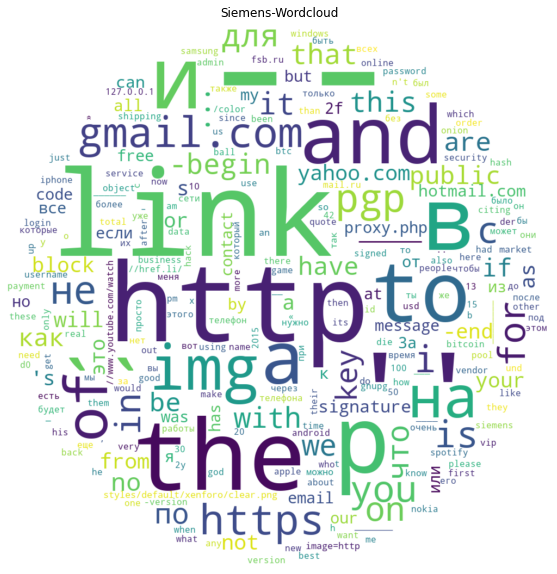

In [27]:
showWordCloud(siemens_dict, f"Siemens-Wordcloud", max_words=int(len(siemens_dict)))

#### Port references

In [28]:
keywords=["port102", "port:102", "bacnet"]

pattern = '|'.join(keywords)

In [29]:
port102_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
port102_df.info(), port102_df.shape, port102_df.iloc[0,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 284018 to 3341033
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             3 non-null      int64 
 1   site_id             3 non-null      int64 
 2   board_id            3 non-null      int64 
 3   thread_id           3 non-null      int64 
 4   username            3 non-null      object
 5   user_id             3 non-null      int64 
 6   user_num_posts      3 non-null      int64 
 7   user_reputation     3 non-null      int64 
 8   content             3 non-null      object
 9   quoted_post_ids     3 non-null      object
 10  post_data_creation  3 non-null      object
 11  site_name           3 non-null      object
 12  board_title         3 non-null      object
 13  thread_title        3 non-null      object
 14  uris_mentioned      3 non-null      object
 15  uris_mentioned_len  3 non-null      int64 
 16  urls_mentioned     

(None,
 (3, 24),
 post_id                                                          493036
 site_id                                                              10
 board_id                                                             41
 thread_id                                                         51839
 username                                                        Omen666
 user_id                                                           26198
 user_num_posts                                                      357
 user_reputation                                                      36
 content               Добавка.\n\nEthereal\nОписание:\nПрофессиональ...
 quoted_post_ids                                                      {}
 post_data_creation                               2007-10-30 15:15:00-02
 site_name                                             forum.antichat.ru
 board_title                                  Безопасность и Анонимность
 thread_title                     

In [30]:
port102_content = ' '.join(port102_df["content"])

In [31]:
port102_dict = get_words_frequency(port102_content)
len(port102_dict)

1247

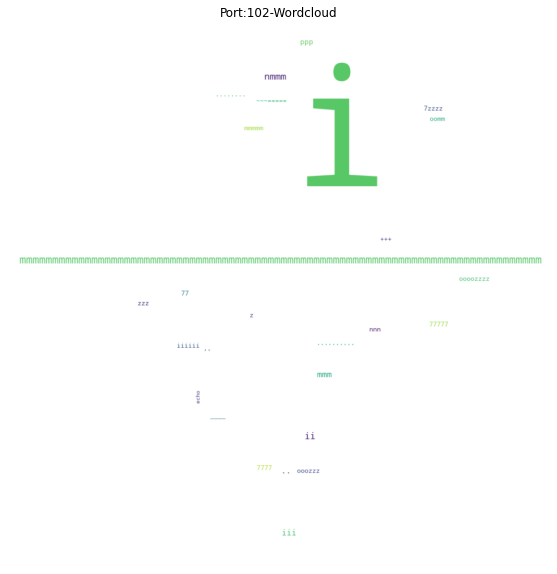

In [75]:
showWordCloud(port102_dict, "Port:102-Wordcloud", max_words=int(len(port102_dict)))

#### CVSS references

In [33]:
keywords=["cvss"]

pattern = '|'.join(keywords)

In [34]:
cvss_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
cvss_df.info(), cvss_df.shape, cvss_df.iloc[0,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 212634 to 3163572
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             43 non-null     int64 
 1   site_id             43 non-null     int64 
 2   board_id            43 non-null     int64 
 3   thread_id           43 non-null     int64 
 4   username            43 non-null     object
 5   user_id             43 non-null     int64 
 6   user_num_posts      43 non-null     int64 
 7   user_reputation     43 non-null     int64 
 8   content             43 non-null     object
 9   quoted_post_ids     43 non-null     object
 10  post_data_creation  43 non-null     object
 11  site_name           43 non-null     object
 12  board_title         43 non-null     object
 13  thread_title        43 non-null     object
 14  uris_mentioned      43 non-null     object
 15  uris_mentioned_len  43 non-null     int64 
 16  urls_mentioned    

(None,
 (43, 24),
 post_id                                                          363690
 site_id                                                              10
 board_id                                                             74
 thread_id                                                         40140
 username                                                         Legalz
 user_id                                                           36586
 user_num_posts                                                        7
 user_reputation                                                       0
 content               Привет, всем. \nЯ начинающий, но уже немного п...
 quoted_post_ids                                                      {}
 post_data_creation                               2007-05-15 13:18:00-03
 site_name                                             forum.antichat.ru
 board_title                                                  Уязвимости
 thread_title            Нашел уя

In [35]:
cvss_content = ' '.join(cvss_df["content"])

In [36]:
cvss_dict = get_words_frequency(cvss_content)
len(cvss_dict)

4719

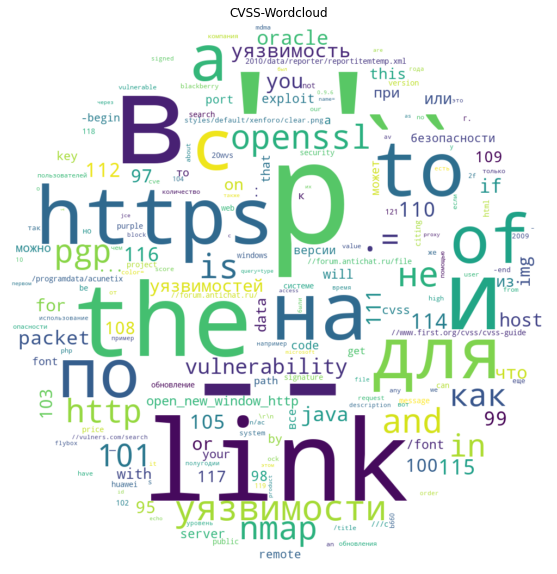

In [37]:
showWordCloud(cvss_dict, f"CVSS-Wordcloud", max_words=int(len(cvss_dict)))

#### EPSS references

In [38]:
keywords=["epss"]

pattern = '|'.join(keywords)

In [39]:
epss_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
epss_df.info(), epss_df.shape, epss_df.iloc[0,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 751651 to 3315372
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             11 non-null     int64 
 1   site_id             11 non-null     int64 
 2   board_id            11 non-null     int64 
 3   thread_id           11 non-null     int64 
 4   username            11 non-null     object
 5   user_id             11 non-null     int64 
 6   user_num_posts      11 non-null     int64 
 7   user_reputation     11 non-null     int64 
 8   content             11 non-null     object
 9   quoted_post_ids     11 non-null     object
 10  post_data_creation  11 non-null     object
 11  site_name           11 non-null     object
 12  board_title         11 non-null     object
 13  thread_title        11 non-null     object
 14  uris_mentioned      11 non-null     object
 15  uris_mentioned_len  11 non-null     int64 
 16  urls_mentioned    

(None,
 (11, 24),
 post_id                                                         1313485
 site_id                                                              10
 board_id                                                             74
 thread_id                                                         38443
 username                                                         RulleR
 user_id                                                           58462
 user_num_posts                                                      180
 user_reputation                                                     313
 content               Code:\nhttp://ezonet.ru/reports.php?page=../in...
 quoted_post_ids                                                      {}
 post_data_creation                               2009-06-06 08:41:00-03
 site_name                                             forum.antichat.ru
 board_title                                                  Уязвимости
 thread_title                    

In [40]:
epss_content = ' '.join(epss_df["content"])

In [41]:
epss_dict = get_words_frequency(epss_content)
len(epss_dict)

3840

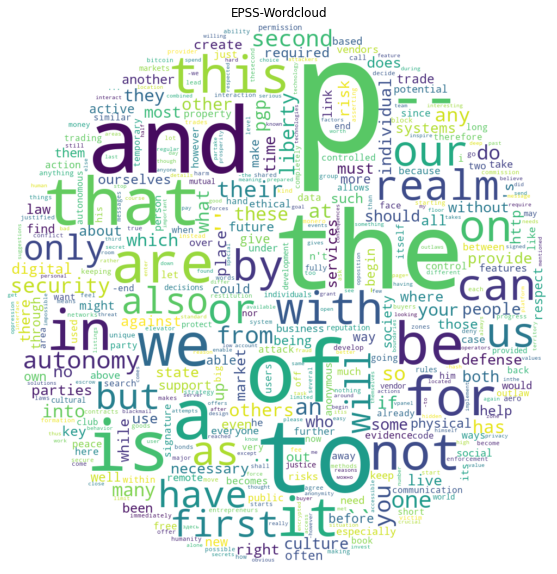

In [42]:
showWordCloud(epss_dict, f"EPSS-Wordcloud", max_words=int(len(epss_dict)))

#### FUD references

In [43]:
keywords=["fud"]

pattern = '|'.join(keywords)

In [44]:
fud_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
fud_df.info(), fud_df.shape, fud_df.iloc[0,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 4073 to 3368753
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             3022 non-null   int64 
 1   site_id             3022 non-null   int64 
 2   board_id            3022 non-null   int64 
 3   thread_id           3022 non-null   int64 
 4   username            3022 non-null   object
 5   user_id             3022 non-null   int64 
 6   user_num_posts      3022 non-null   int64 
 7   user_reputation     3022 non-null   int64 
 8   content             3022 non-null   object
 9   quoted_post_ids     3022 non-null   object
 10  post_data_creation  3022 non-null   object
 11  site_name           3022 non-null   object
 12  board_title         3022 non-null   object
 13  thread_title        3021 non-null   object
 14  uris_mentioned      3022 non-null   object
 15  uris_mentioned_len  3022 non-null   int64 
 16  urls_mentioned    

(None,
 (3022, 24),
 post_id                                                            4839
 site_id                                                              10
 board_id                                                             46
 thread_id                                                           736
 username                                                         Matias
 user_id                                                            1786
 user_num_posts                                                       22
 user_reputation                                                       0
 content               Или еще можешь скачать с сайта ***LINK***http:...
 quoted_post_ids                                                      {}
 post_data_creation                               2003-05-13 15:35:00-03
 site_name                                             forum.antichat.ru
 board_title                                                    Болталка
 thread_title                  

In [45]:
fud_content = ' '.join(fud_df["content"])

In [46]:
fud_dict = get_words_frequency(fud_content)
len(fud_dict)

83734

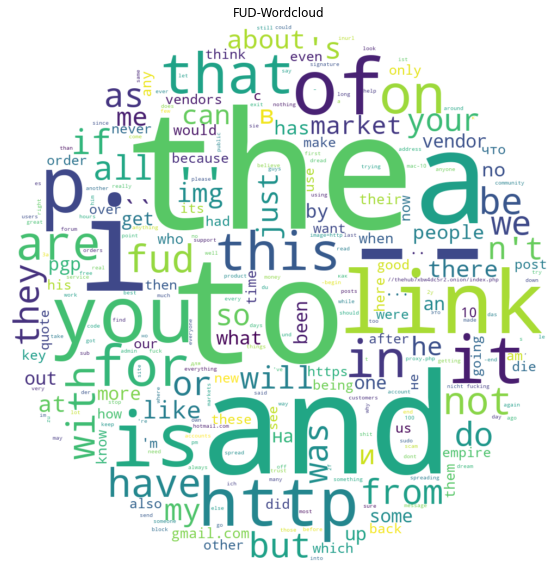

In [47]:
showWordCloud(fud_dict, f"FUD-Wordcloud", max_words=int(len(fud_dict)))

#### SHODAN references

In [48]:
keywords=["shodan"]

pattern = '|'.join(keywords)

In [49]:
shodan_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
shodan_df.info(), shodan_df.shape, shodan_df.iloc[0,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 963731 to 3368745
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             298 non-null    int64 
 1   site_id             298 non-null    int64 
 2   board_id            298 non-null    int64 
 3   thread_id           298 non-null    int64 
 4   username            298 non-null    object
 5   user_id             298 non-null    int64 
 6   user_num_posts      298 non-null    int64 
 7   user_reputation     298 non-null    int64 
 8   content             298 non-null    object
 9   quoted_post_ids     298 non-null    object
 10  post_data_creation  298 non-null    object
 11  site_name           298 non-null    object
 12  board_title         298 non-null    object
 13  thread_title        298 non-null    object
 14  uris_mentioned      298 non-null    object
 15  uris_mentioned_len  298 non-null    int64 
 16  urls_mentioned   

(None,
 (298, 24),
 post_id                                                         1717658
 site_id                                                              10
 board_id                                                             72
 thread_id                                                        159436
 username                                                          Flins
 user_id                                                          105012
 user_num_posts                                                        4
 user_reputation                                                       0
 content               ***CITING***[about:blank]***CITING***this engi...
 quoted_post_ids                                                      {}
 post_data_creation                               2009-11-26 21:25:00-02
 site_name                                             forum.antichat.ru
 board_title                            Forum for discussion of ANTICHAT
 thread_title                   

In [50]:
shodan_content = ' '.join(shodan_df["content"])

In [51]:
shodan_dict = get_words_frequency(shodan_content)
len(shodan_dict)

14819

In [65]:
shodan_dict

FreqDist({'link': 5199, 'https': 2688, 'http': 2350, 'the': 1087, '--': 785, 'to': 757, 'and': 648, 'a': 590, 'of': 501, 'и': 408, ...})

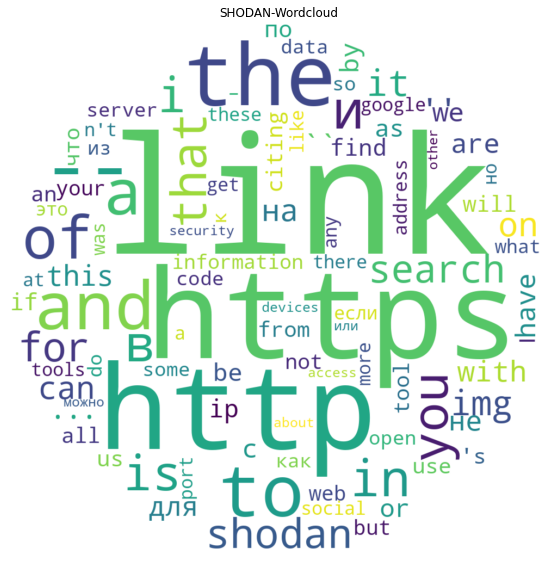

In [70]:
showWordCloud(shodan_dict, "SHODAN-Wordcloud", max_words=int(len(shodan_dict)))

#### COVID References

In [53]:
keywords=["covid", "covid19", "covid-19", "sars", "sars-cov-2", "sars-cov"]

pattern = '|'.join(keywords)

In [54]:
covid_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
covid_df.info(), covid_df.shape, covid_df.iloc[0,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 336039 to 3317844
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             128 non-null    int64 
 1   site_id             128 non-null    int64 
 2   board_id            128 non-null    int64 
 3   thread_id           128 non-null    int64 
 4   username            128 non-null    object
 5   user_id             128 non-null    int64 
 6   user_num_posts      128 non-null    int64 
 7   user_reputation     128 non-null    int64 
 8   content             128 non-null    object
 9   quoted_post_ids     128 non-null    object
 10  post_data_creation  128 non-null    object
 11  site_name           128 non-null    object
 12  board_title         128 non-null    object
 13  thread_title        128 non-null    object
 14  uris_mentioned      128 non-null    object
 15  uris_mentioned_len  128 non-null    int64 
 16  urls_mentioned   

(None,
 (128, 24),
 post_id                                                          584797
 site_id                                                              10
 board_id                                                             76
 thread_id                                                         54936
 username                                                       Mr. P.S.
 user_id                                                           37015
 user_num_posts                                                      183
 user_reputation                                                      35
 content               Хеши расшифрованные с http://md5.xek.cc/noncra...
 quoted_post_ids                                                      {}
 post_data_creation                               2008-02-04 19:24:00-02
 site_name                                             forum.antichat.ru
 board_title                             Криптография, расшифровка хешей
 thread_title                 Ан

In [55]:
covid_content = ' '.join(covid_df["content"])

In [56]:
covid_dict = get_words_frequency(covid_content)
len(covid_dict)

16008

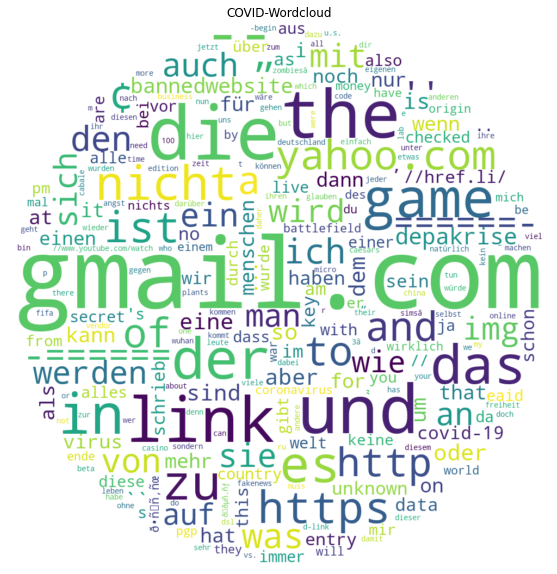

In [57]:
showWordCloud(covid_dict, "COVID-Wordcloud", max_words=int(len(covid_dict)))

#### CVE references

In [58]:
keywords=["cve"]

pattern = '|'.join(keywords)

In [59]:
cve_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
cve_df.info(), cve_df.shape, cve_df.iloc[0,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 866 to 3367030
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   post_id             1479 non-null   int64 
 1   site_id             1479 non-null   int64 
 2   board_id            1479 non-null   int64 
 3   thread_id           1479 non-null   int64 
 4   username            1479 non-null   object
 5   user_id             1479 non-null   int64 
 6   user_num_posts      1479 non-null   int64 
 7   user_reputation     1479 non-null   int64 
 8   content             1479 non-null   object
 9   quoted_post_ids     1479 non-null   object
 10  post_data_creation  1479 non-null   object
 11  site_name           1479 non-null   object
 12  board_title         1479 non-null   object
 13  thread_title        1479 non-null   object
 14  uris_mentioned      1479 non-null   object
 15  uris_mentioned_len  1479 non-null   int64 
 16  urls_mentioned     

(None,
 (1479, 24),
 post_id                                                            1166
 site_id                                                              10
 board_id                                                            114
 thread_id                                                           246
 username                                                   Dj Skeleton™
 user_id                                                            1371
 user_num_posts                                                      224
 user_reputation                                                       1
 content               </span><table border="0" align="center" width=...
 quoted_post_ids                                                      {}
 post_data_creation                               2002-10-13 10:18:00-03
 site_name                                             forum.antichat.ru
 board_title                                              Веб-уязвимости
 thread_title                  

In [60]:
# cve_df["content"] = cve_df["content"].apply(lambda x: re.sub('[0-9]+', "", x) )
cve_content = ' '.join(cve_df["content"])

In [61]:
cve_dict = get_words_frequency(cve_content)
len(cve_dict)

92175

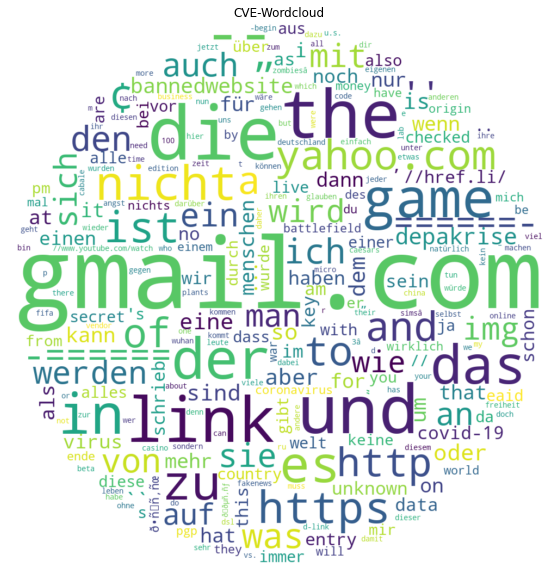

In [62]:
showWordCloud(covid_dict, "CVE-Wordcloud", max_words=int(len(cve_dict)))

#### Focus on CVE

In [63]:
cve_df["cve_codes"] = cve_df["content"].apply(lambda x: re.findall(r'(cve-[0-9]*-[0-9]*)', x.lower(), flags=re.IGNORECASE) )

/tmp/ipykernel_608133/1349211113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cve_df["cve_codes"] = cve_df["content"].apply(lambda x: re.findall(r'(cve-[0-9]*-[0-9]*)', x.lower(), flags=re.IGNORECASE) )


In [64]:
245 129 134

SyntaxError: invalid syntax (2559590504.py, line 1)

In [ ]:
import itertools
list(set(list(itertools.chain(*cve_df["cve_codes"].values.tolist()))))

In [ ]:
len(list(set(list(itertools.chain(*cve_df["cve_codes"].values.tolist())))))

In [ ]:
df__ = pd.read_csv("../data/CVE_info.csv", sep=",", low_memory=False, encoding="ISO-8859-1")
df__